In [2]:
import os
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt
import matplotlib
import wordcloud
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

from utils import preprocessing
from sklearn.feature_extraction import text
from sklearn import decomposition

data_dir = "/home/stavros/DATA/AirbnbReviews"
#data_dir = "D:/"

In [3]:
area = "nyc"

area_dir = os.path.join(data_dir, area)
sampled_reviews = pd.read_csv(os.path.join(area_dir, "nyc_reviews_nostopwords_en_20000samples.csv"))
print(sampled_reviews.shape)
print(sampled_reviews.columns)

(20000, 8)
Index(['Unnamed: 0', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'normalized_comments'],
      dtype='object')


In [5]:
text = " ".join(review for review in sampled_reviews.normalized_comments)

In [62]:
from PIL import Image
map_mask = np.array(Image.open(os.path.join(data_dir, "usa_clean.png")))
map_mask = map_mask[:, :, :-1] # remove last channel that is full of 255 (for some reason I don't know)
map_mask.shape

image_colors = wordcloud.ImageColorGenerator(map_mask)

In [87]:
full_blue = np.array(np.prod(map_mask.shape[:2]) * [map_mask[0, 0]]).reshape(map_mask.shape)

earth_only = np.copy(map_mask)
indx, indy, _ = np.where(map_mask == full_blue)
earth_only[indx, indy] = 255 * np.ones(map_mask[indx, indy].shape)

ocean_only = np.copy(map_mask)
indx, indy, _ = np.where(map_mask != full_blue)
ocean_only[indx, indy] = 255 * np.ones(map_mask[indx, indy].shape)

In [97]:
wordcloud_fig = wordcloud.WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                                    colormap="twilight",
                                    max_words=80, 
                                    max_font_size=60, 
                                    mask=earth_only,
                                    random_state=42).generate(text)

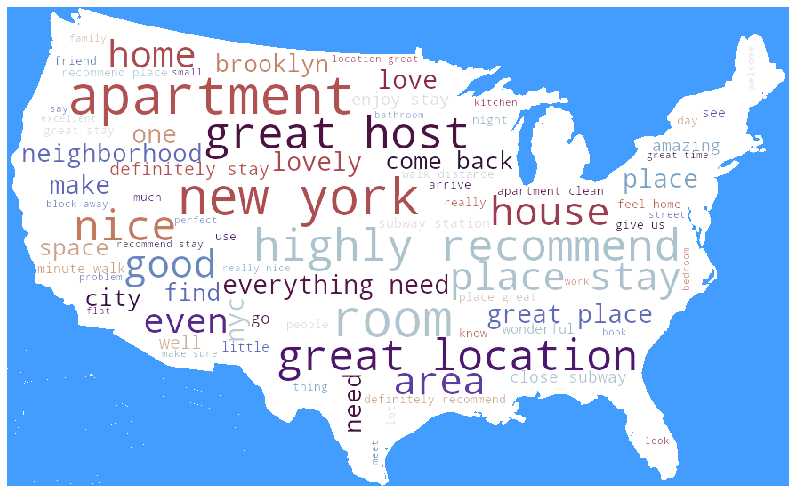

In [98]:
plt.figure(figsize=(14, 10))
plt.imshow(ocean_only)
plt.imshow(wordcloud_fig)
plt.axis("off")
plt.show()